<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/BQkMs2zd/inkpx-word-art.png">

<img src="https://i.postimg.cc/13wPRjV1/443997.png">

<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c"> Table Of Content</p></b></h1>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">

<h2><span style="text-align:center; font-weight:bolder; color:navy; font-size:130%">Table of Contents:</span></h2>

 * **[Step 1 | Python Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
    -  [2.2 | Data Information](#info)
    -  [2.3 | Attribute Information](#columns)
 *  **[Step 3 | Data Preprocessning](#preprocessing)**
    -  [3.1 | Missing Values Handling](#missing)
    -  [3.2 | Visualization and Plots](#plot)
    -  [3.3 | Plots Analysis](#plot_analysis)
    -  [3.4 | Target Categorizing](#Target_Categorizing)
    -  [3.5 | Normalization](#norm)
 *  **[Step 4 | Modeling](#ml)**
    -  [4.1 | Initialization](#init)
    -  [4.2 | RandomForestClassifier](#rf)
    -  [4.3 | LogisticRegression](#lr)
    -  [4.4 | SVC](#svc)
    -  [4.5 | DecisionTreeClassifier](#tree)
    -  [4.6 | KNeighborsClassifier](#knn)
    -  [4.7 | GaussianNB](#gnb)
    -  [4.8 | result](#result)
    -  [4.9 | Final Modeling](#final_ml)
 *  **[Author](#author)**

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | Python Libraries</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="import"></a>
<h2><b><span style="color:#009b2d">🍷 Step 1.1 | </span><span style="color:#9b006e">Import Libraries</span></b></h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

print(colored('\nAll libraries imported succesfully.', 'green'))


All libraries imported succesfully.


<a id="config"></a>
<h2><b><span style="color:#009b2d">🍷 Step 1.2 | </span><span style="color:#9b006e">Library configurations</span></b></h2>

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [3]:
sns.color_palette("cool_r", n_colors=1)

[(0.4980392156862745, 0.5019607843137255, 1.0)]

In [4]:
sns.set_palette("cool_r")
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


<a id="data"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step2 | Data</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="load_data"></a>
<h2><b><span style="color:#009b2d">🍷 Step 2.1 | </span><span style="color:#9b006e">Collecting Data</span></b></h2>

In [5]:
# Import data by using pandas liblary and using read_csv method
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id="info"></a>
<h2><b><span style="color:#009b2d">🍷 Step 2.2 | </span><span style="color:#9b006e">Data Information</span></b></h2>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


<a id="columns"></a>
<h2><b><span style="color:#009b2d">🍷 Step 2.3 | </span><span style="color:#9b006e">Attribute Information</span></b></h2>

<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">
    
<h2 style='border:0; border-radius: 15px; font-weight: 800; color:#9b006e; font-size:280%'><center> Attribute Information
</center></h2>

|Feature|Explain|
|-------|-------|
|**fixed acidity**|most acids involved with wine or fixed or nonvolatile|
|**volatile acidity**|the amount of acetic acid in wine|
|**citric acid**|the amount of citric acid in wine|
|**residual sugar**|the amount of sugar remaining after fermentation stops|
|**chlorides**|the amount of salt in the wine.|
|**free sulfur dioxide**|the amount of free sulfur dioxide in the wine(those available to react and thus exhibit both germicidal and antioxidant properties)|
|**total sulfur dioxide**|amount of free and bound forms of SO2|
|**density**|the measurement of how tightly a material is packed together|
|**PH**|describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4|
|**Alcohol**|the percent alcohol content of the wine|
|**quality**|output variable (based on sensory data, score between 3 and 8)|

<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | Data Preprocessning</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="missing"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.1 | </span><span style="color:#9b006e">Missing Values Handling</span></b></h2>

In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<div style='background-color:#faedfa'>
<h3>➡️There is no missing values</h3>
</div>

<a id="plot"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.2 | </span><span style="color:#9b006e">Visualization and Plots</span></b></h2>

In [9]:
# Rename columns to better recall them.
data.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

In [10]:
# Create a list of DataFrame columns
columns = list(data.columns)

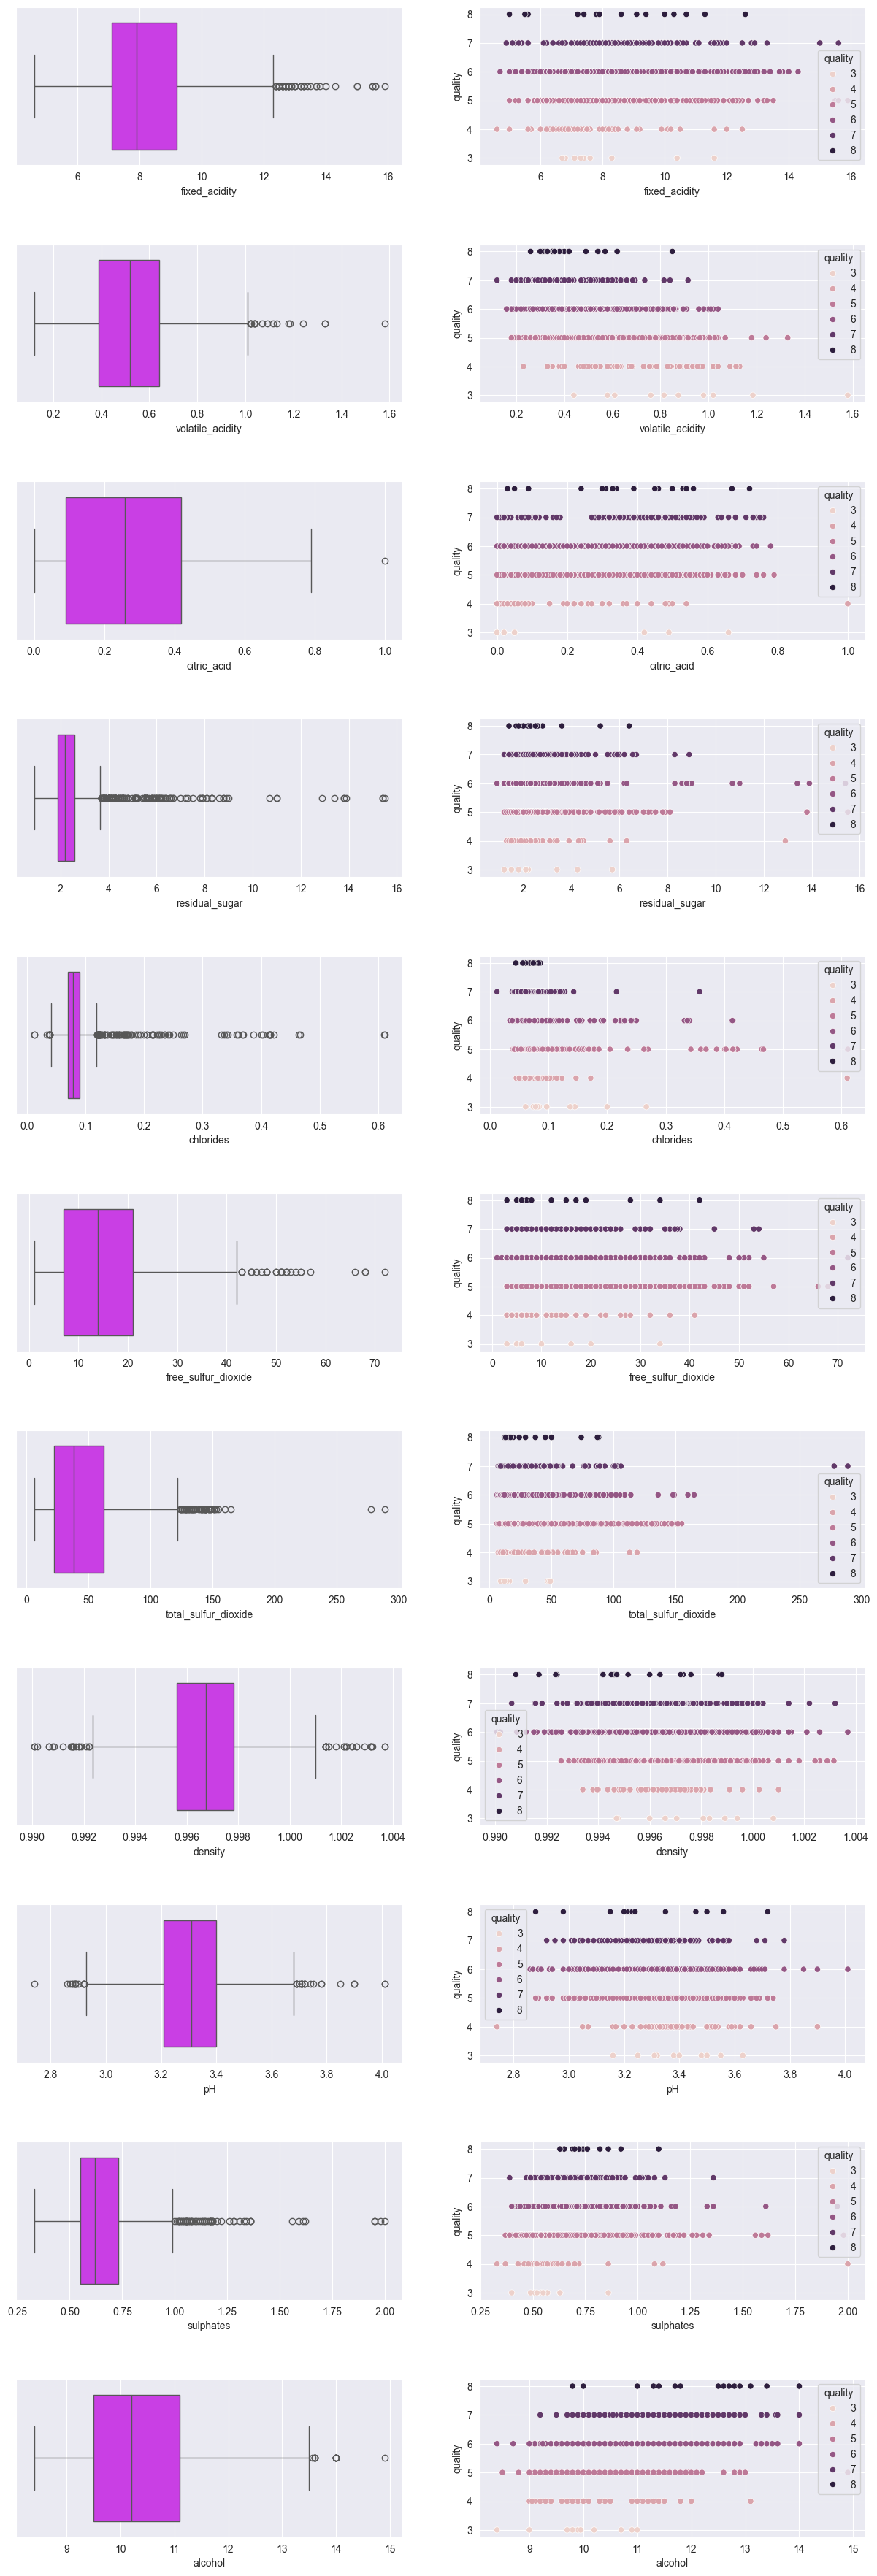

In [11]:
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=data, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=data, hue='quality', ax=ax[i, 1])

<div style='background-color:#faedfa'>
<h3>➡️There is no Outlier in data.</h3>
</div>

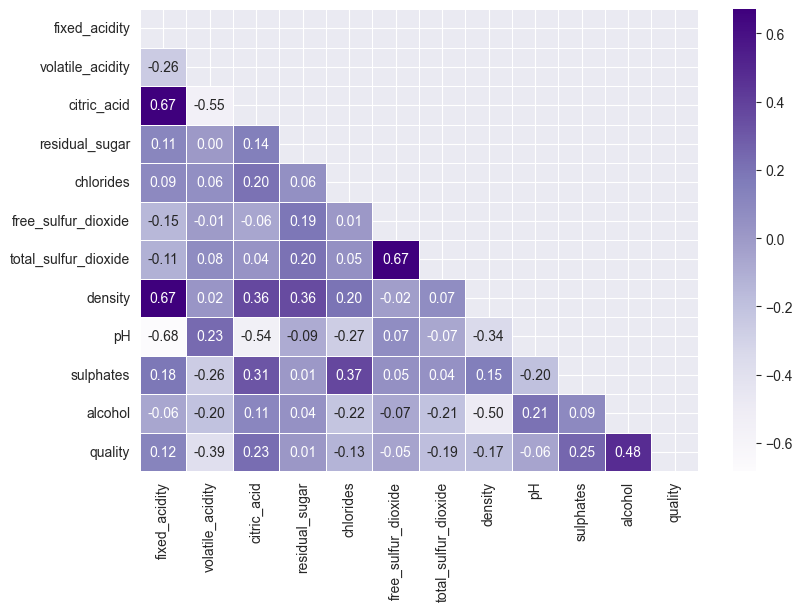

In [12]:
corr = data.corr()
# cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

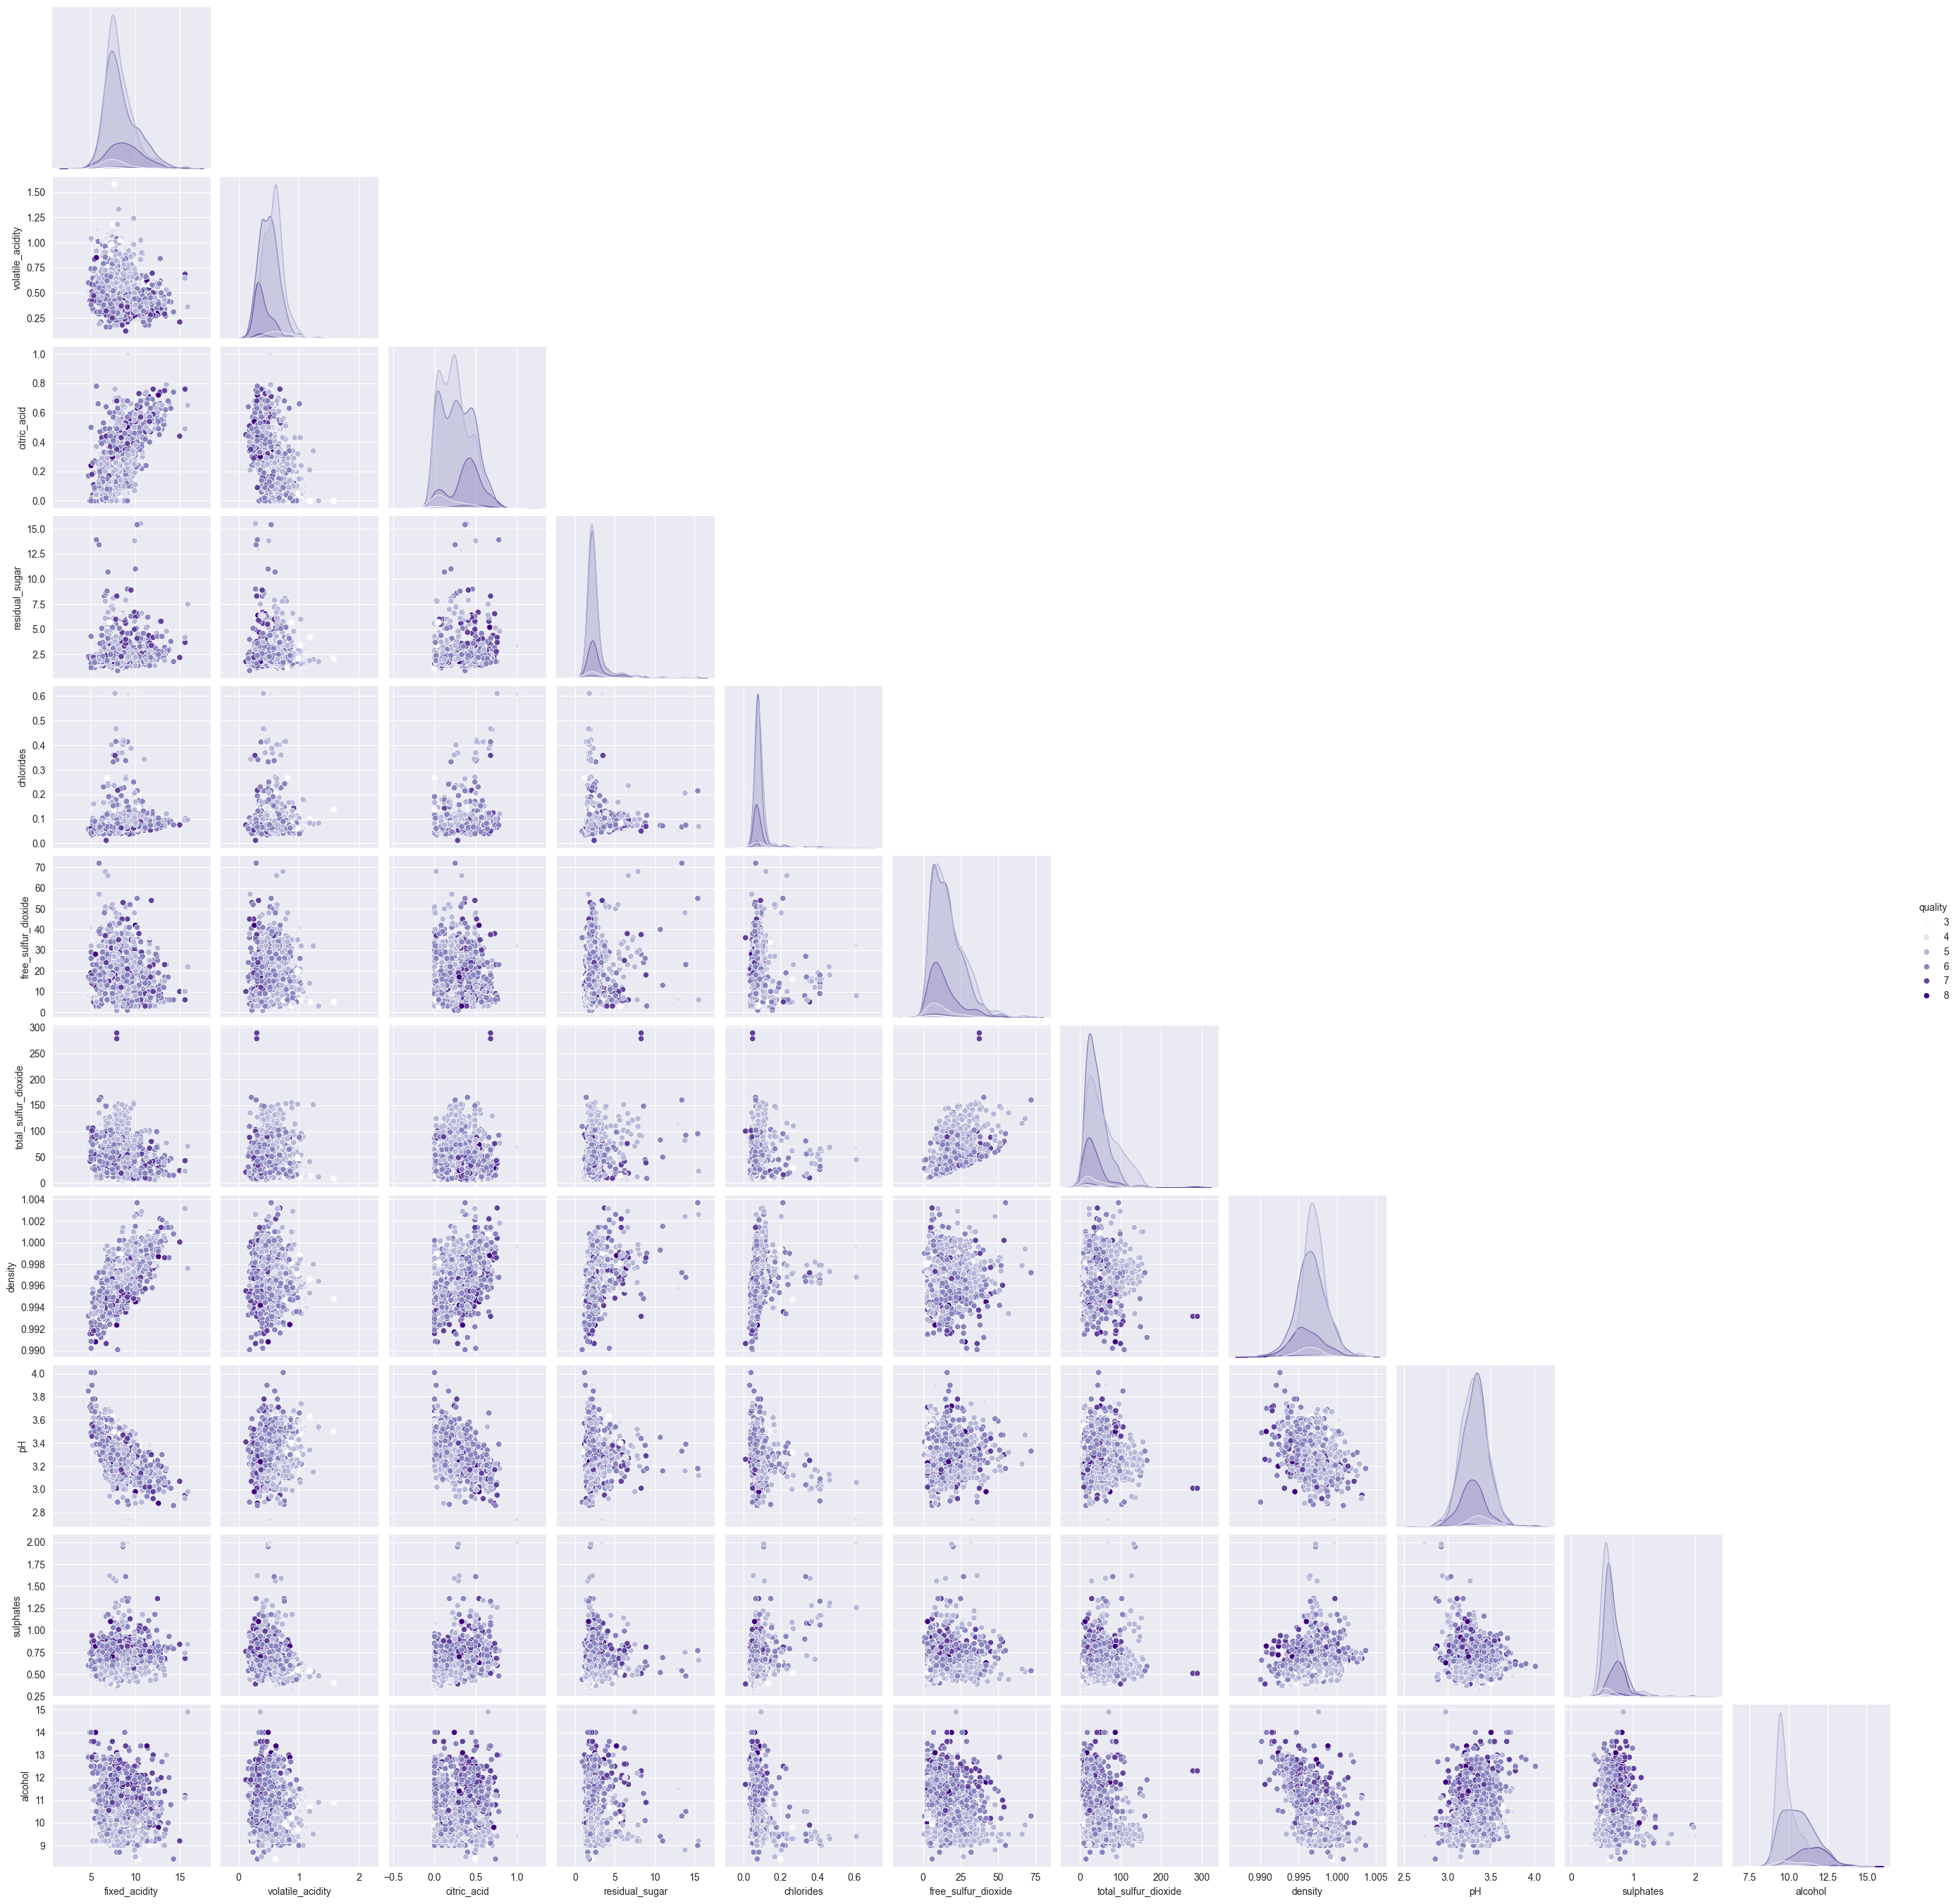

In [13]:
sns.pairplot(data, hue='quality', corner = True, palette='Purples')

<a id="plot_analysis"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.3 | </span><span style="color:#9b006e">Plots Analysis</span></b></h2>

<div style='background-color:#faedfa'>
    
<h3><b>➡️Best Correlations are between :</b></h3>
    <ul><h5>citeic_acid & flex_acidity ---> 0.67</h5></ul>
    <ul><h5>density & flex_acidity ---> 0.67</h5></ul>
    <ul><h5>total_sulfor_dioxide & free_sulfor_dioxide ---> 0.67</h5></ul>
</div>

<a id="Target_Categorizing"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.4 | </span><span style="color:#9b006e">Target Categorizing</span></b></h2>

In [14]:
# Quality classes :
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<div style='background-color:#faedfa'>
    <h4>Replace values in quality column to <mark>Good</mark> and <mark>Middle</mark> and <mark>Bad</mark></h4>
</div>

In [15]:
data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)

In [16]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


<a id="norm"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.5 | </span><span style="color:#9b006e">Normalization</span></b></h2>

In [17]:
# Create X from DataFrame and y as Target
X_temp = data.drop(columns='quality')
y = data.quality

<div style='background-color:#faedfa'>
<h4>➡️Normalize X data to decrease effect of larg number.</h4>
<h4>Here, Using MinMaxScaler and ranged in [0, 1]</h4>
</div>

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.000000,0.329171,0.154079,0.000000,0.221239,0.292035,0.407080,1.000000
volatile_acidity,1599.000000,0.279329,0.122644,0.000000,0.184932,0.273973,0.356164,1.000000
citric_acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual_sugar,1599.000000,0.112247,0.096570,0.000000,0.068493,0.089041,0.116438,1.000000
chlorides,1599.000000,0.125988,0.078573,0.000000,0.096828,0.111853,0.130217,1.000000
free_sulfur_dioxide,1599.000000,0.209506,0.147326,0.000000,0.084507,0.183099,0.281690,1.000000
total_sulfur_dioxide,1599.000000,0.142996,0.116238,0.000000,0.056537,0.113074,0.197880,1.000000
density,1599.000000,0.490211,0.138571,0.000000,0.406021,0.490455,0.570117,1.000000
pH,1599.000000,0.449695,0.121564,0.000000,0.370079,0.448819,0.519685,1.000000
sulphates,1599.000000,0.196496,0.101501,0.000000,0.131737,0.173653,0.239521,1.000000


<a id="modeling"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Modeling</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="norm"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.1 | </span><span style="color:#9b006e">Initialization</span></b></h2>

In [19]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Purples")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle']) 
    plt.show()

In [20]:
# define a function to ploting Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [21]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    
    # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [22]:
data.quality.value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [23]:
# Splite Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<a id="rf"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.2 | </span><span style="color:#9b006e">RandomForestClassifier</span></b></h2>

In [24]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 500}
accuracy :  0.8648870056497175


In [25]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [26]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.88


In [27]:
y_test.value_counts()

quality
Middle    339
Good       45
Bad        16
Name: count, dtype: int64

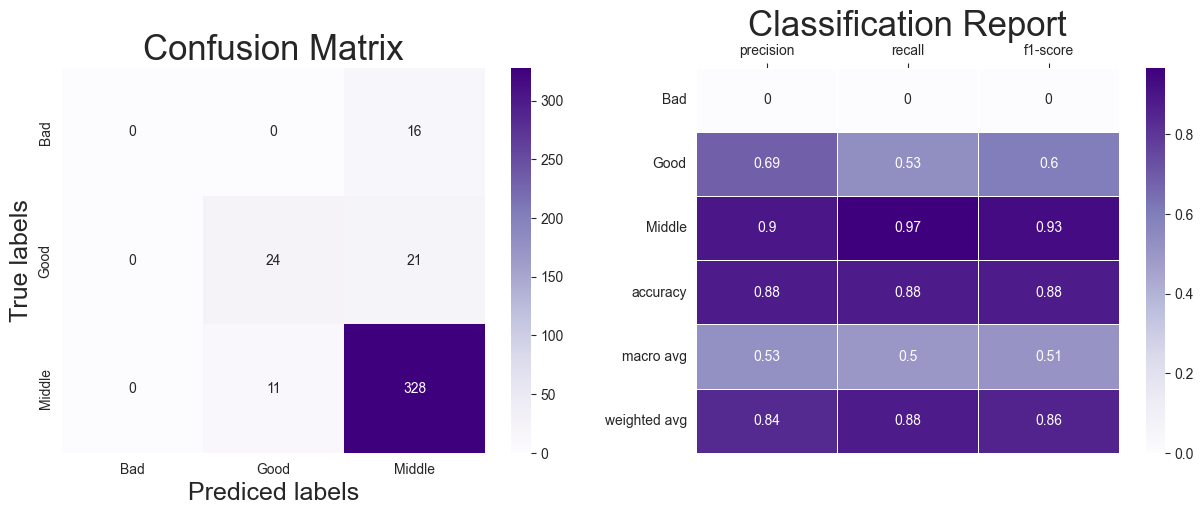

In [28]:
clf_plot(y_pred_rf)

<a id="lr"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.3 | </span><span style="color:#9b006e">LogisticRegression</span></b></h2>

In [29]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.82484593837535


In [30]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [31]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.85


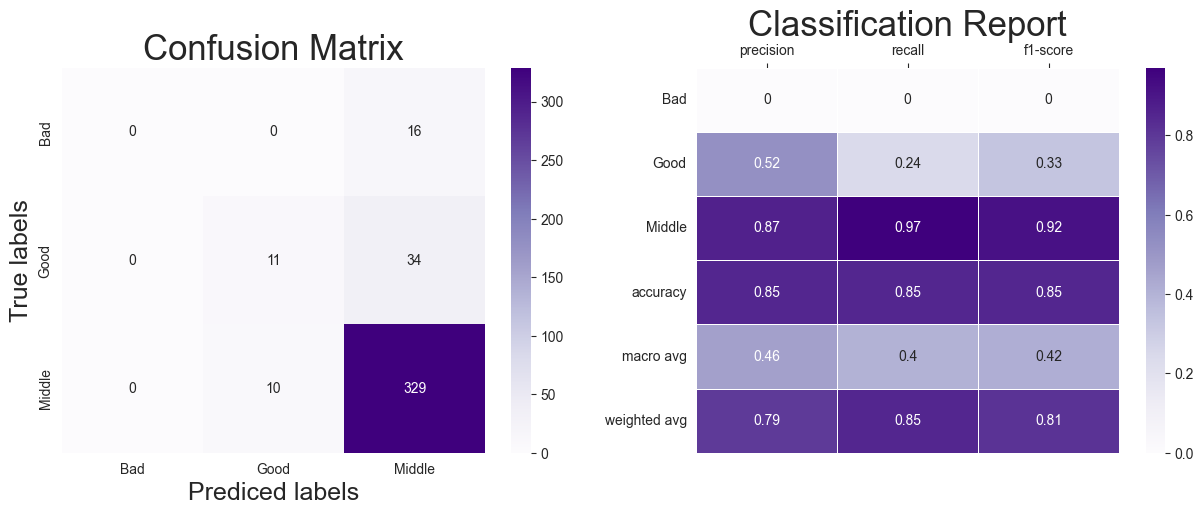

In [32]:
clf_plot(y_pred_lr)

<a id="svc"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.4 | </span><span style="color:#9b006e">SVC</span></b></h2>

In [33]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 100}
accuracy :  0.8532212885154061


In [34]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [35]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.888


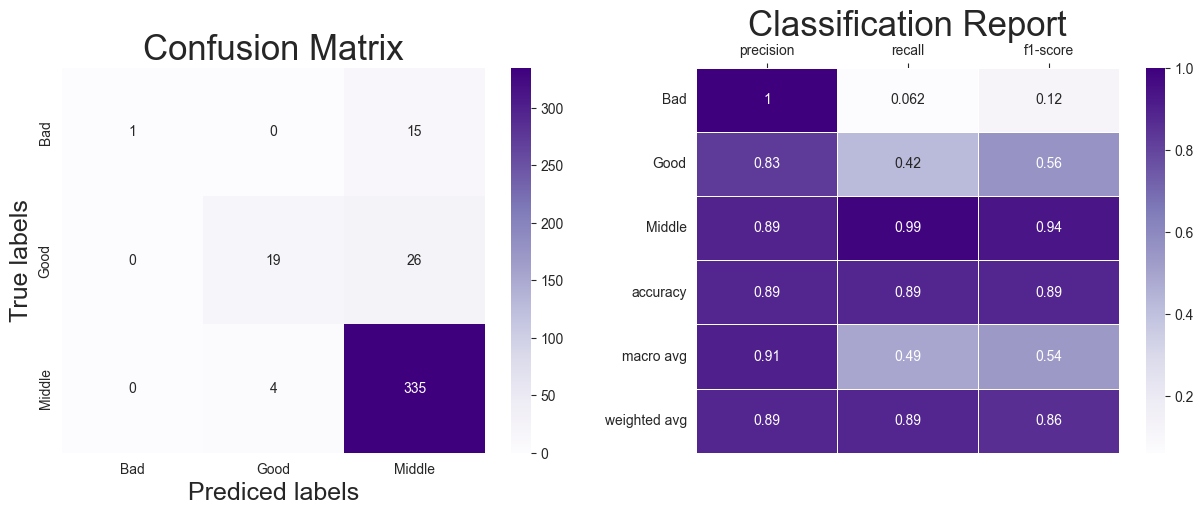

In [36]:
clf_plot(y_pred_svc)

<a id="tree"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.5 | </span><span style="color:#9b006e">DecisionTreeClassifier</span></b></h2>

In [37]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
accuracy :  0.8373529411764705


In [38]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [39]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.855


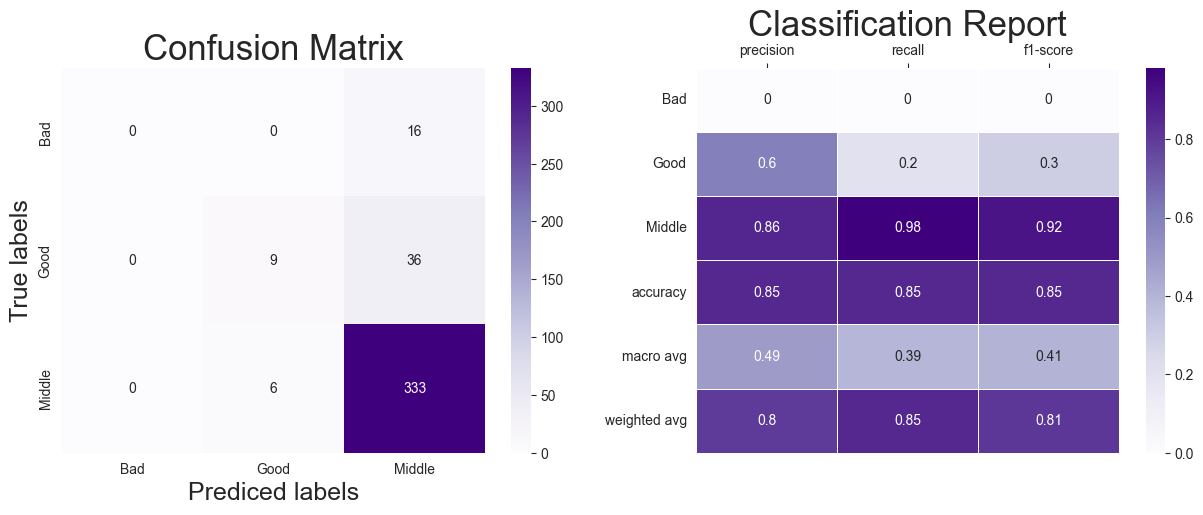

In [40]:
clf_plot(y_pred_tree)

<a id="knn"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.6 | </span><span style="color:#9b006e">KNeighborsClassifier</span></b></h2>

In [41]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
accuracy :  0.8615616246498599


In [42]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [43]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.855


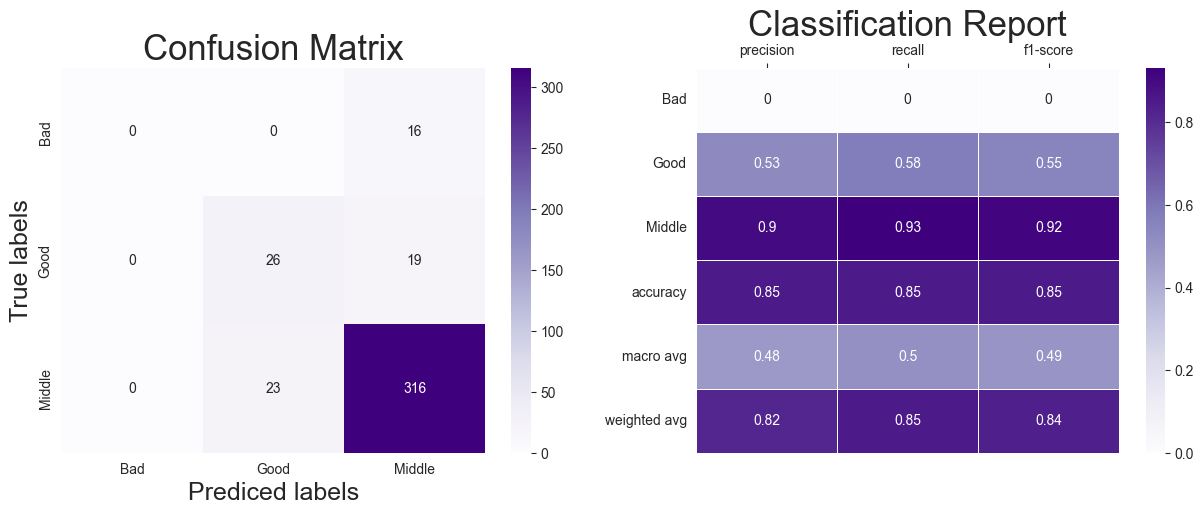

In [44]:
clf_plot(y_pred_knn)

<a id="gnb"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.7 | </span><span style="color:#9b006e">GaussianNB</span></b></h2>

In [45]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

GNB Score : 0.762


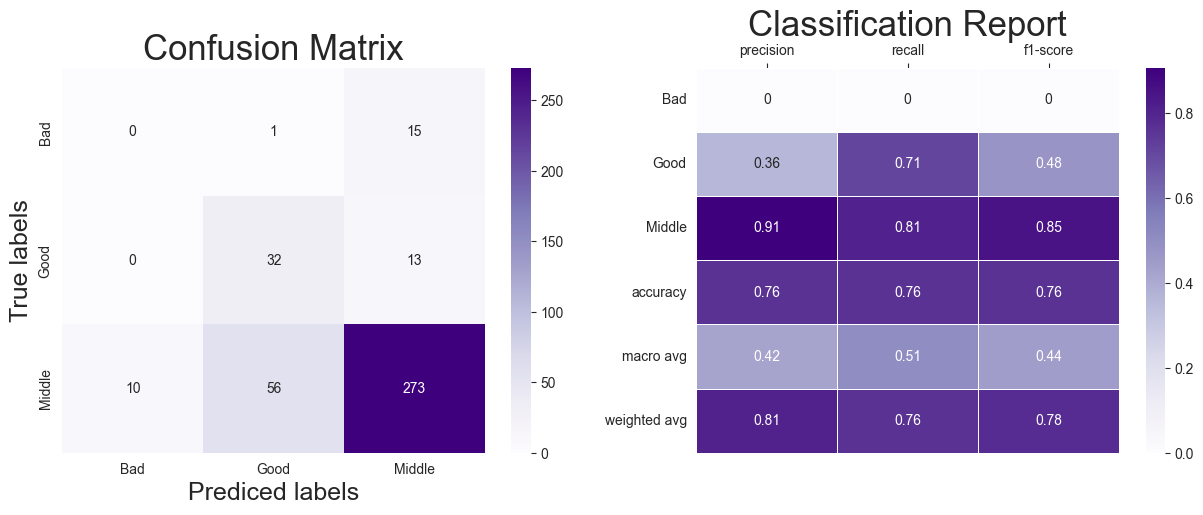

In [46]:
clf_plot(y_pred_gnb)

<a id="result"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.8 | </span><span style="color:#9b006e">Result</span></b></h2>

In [47]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)

In [48]:
sns.set_palette("Purples")

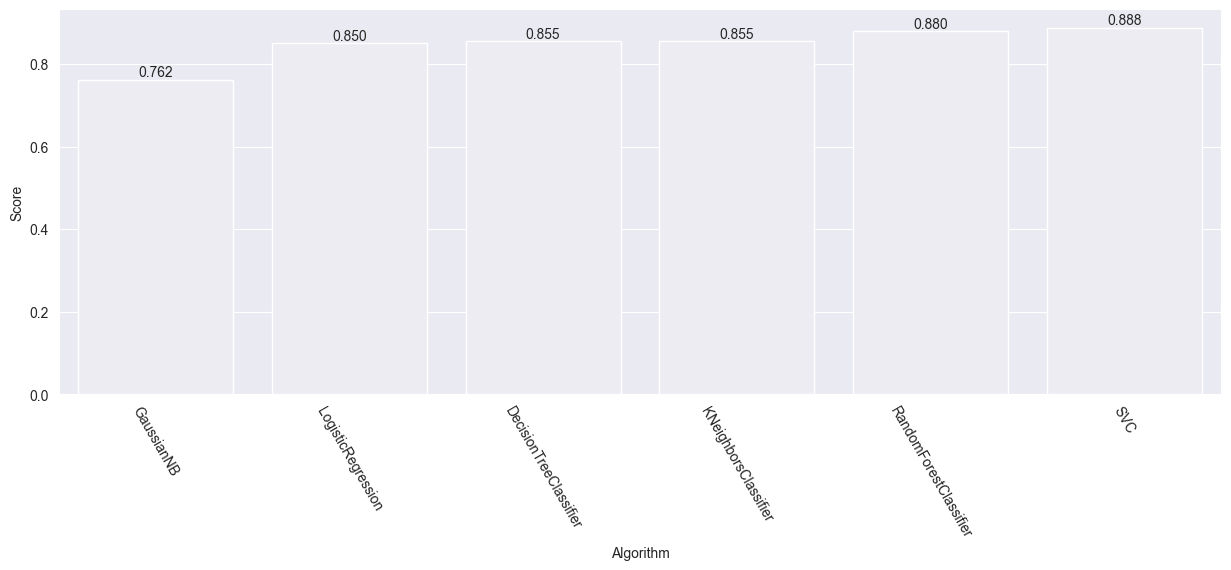

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:#005f26">Results : </h3>

<span style="font-size:120%; font-weight:700; color:#005f26">Acording to the above plots, best algorithm base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:#005f26">
<ul>SVC</ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:navy">So, We choose <mark> SVC </mark></span>
</div>

<a id="final_ml"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.9 | </span><span style="color:#9b006e">Final Modeling</span></b></h2>

In [50]:
# Model
svc = SVC(**svc_cv.best_params_)

In this step, we train model with all of data.

In [51]:
svc.fit(X, y)

SVC(C=10, gamma=100)

<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<a id="author"></a>    
<div style="border-radius:10px; padding: 15px; font-size:130%; text-align:left; background-image: url(https://i.postimg.cc/nVvLN8XJ/1567862.jpg)">

<h4 align="left"><span style="font-weight:700; font-size:150%"><font color=#d10202>Author:</font><font color=navy> Nima Pourmoradi</font></span></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/NimaPourmoradi</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/nimapourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : www.linkedin.com/in/nima-pourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://t.me/Nima_Pourmoradi'>Telegram : https://t.me/Nima_Pourmoradi</a></font></h6>